In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatherww2/Summary of Weather.csv
/kaggle/input/weatherww2/Weather Station Locations.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/weatherww2/Summary of Weather.csv',low_memory=False)

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [6]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [7]:
df.shape

(119040, 31)

In [8]:
df = df.drop(columns=["WindGustSpd","PoorWeather","DR","SPD","TSHDSBRSGF","Date","SND","FT","FB","FTI","ITH","PGT","SD3","RHX","RHN","RVG","WTE"],axis=1)

In [9]:
df.isnull().sum()

STA            0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  117877 non-null  object 
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      117108 non-null  object 
 10  MAX       118566 non-null  float64
 11  MIN       118572 non-null  float64
 12  MEA       118542 non-null  float64
 13  SNF       117877 non-null  object 
dtypes: float64(6), int64(4), object(4)
memory usage: 12.7+ MB


In [11]:
df["Precip"].unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

In [12]:
df[df["Precip"] == "T"]

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
6,10001,T,28.333333,22.777778,25.555556,0,42,7,7,T,83.0,73.0,78.0,0
8,10001,T,27.222222,22.777778,25.000000,0,42,7,9,T,81.0,73.0,77.0,0
15,10001,T,26.111111,21.111111,23.333333,0,42,7,16,T,79.0,70.0,74.0,0
16,10001,T,28.333333,22.222222,25.555556,0,42,7,17,T,83.0,72.0,78.0,0
17,10001,T,26.666667,21.111111,23.888889,0,42,7,18,T,80.0,70.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119001,82506,T,26.666667,18.333333,22.222222,0,45,11,23,T,80.0,65.0,72.0,0
119006,82506,T,28.333333,21.111111,24.444444,0,45,11,28,T,83.0,70.0,76.0,0
119014,82506,T,27.222222,17.777778,22.222222,0,45,12,6,T,81.0,64.0,72.0,0
119018,82506,T,30.000000,19.444444,24.444444,0,45,12,10,T,86.0,67.0,76.0,0


In [13]:
df["Precip"] = df["Precip"].replace('T',0)
df["Precip"] = df["Precip"].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  float64
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  117877 non-null  object 
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      117108 non-null  object 
 10  MAX       118566 non-null  float64
 11  MIN       118572 non-null  float64
 12  MEA       118542 non-null  float64
 13  SNF       117877 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 12.7+ MB


In [15]:
df["Snowfall"].unique()

array(['0', nan, '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!'],
      dtype=object)

In [16]:
df[df["Snowfall"] == "#VALUE!"]

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
48609,16504,0.000,-10.000000,-17.777778,-13.888889,#VALUE!,43,1,26,0,14.0,0.0,7.0,T
48610,16504,0.000,-10.000000,-13.333333,-11.666667,#VALUE!,43,1,27,0,14.0,8.0,11.0,T
48611,16504,1.524,-8.333333,-11.666667,-10.000000,#VALUE!,43,1,28,0.06,17.0,11.0,14.0,T
48690,16504,0.000,-1.111111,-8.888889,-5.000000,#VALUE!,43,4,17,T,30.0,16.0,23.0,T
48693,16504,0.000,-8.888889,-16.666667,-12.777778,#VALUE!,43,4,20,T,16.0,2.0,9.0,T
48694,16504,0.000,-11.111111,-18.888889,-15.000000,#VALUE!,43,4,21,0,12.0,-2.0,5.0,T
48695,16504,0.000,-11.111111,-20.000000,-15.555556,#VALUE!,43,4,22,T,12.0,-4.0,4.0,T
48696,16504,0.000,-11.666667,-20.000000,-15.555556,#VALUE!,43,4,23,0,11.0,-4.0,4.0,T
48697,16504,0.000,3.333333,-13.333333,-5.000000,#VALUE!,43,4,24,0,38.0,8.0,23.0,T
48698,16504,0.000,0.000000,-6.666667,-3.333333,#VALUE!,43,4,25,T,32.0,20.0,26.0,T


In [17]:
df["Snowfall"] = df["Snowfall"].replace('#VALUE!',np.nan)
df["Snowfall"] = df["Snowfall"].astype(float)
df["Snowfall"] = df["Snowfall"].fillna(df["Snowfall"].median())

In [18]:
df["Snowfall"].unique()

array([ 0.  , 22.86, 33.02, 30.48,  2.54,  5.08, 10.16,  7.62, 20.32,
       15.24, 17.78, 12.7 , 25.4 , 27.94, 43.18, 38.1 , 45.72, 53.34,
       58.42, 66.04, 76.2 , 81.28, 73.66, 63.5 , 50.8 , 48.26, 60.96,
       55.88, 35.56, 78.74, 40.64, 86.36, 83.82, 68.58])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  float64
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  119040 non-null  float64
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      117108 non-null  object 
 10  MAX       118566 non-null  float64
 11  MIN       118572 non-null  float64
 12  MEA       118542 non-null  float64
 13  SNF       117877 non-null  object 
dtypes: float64(8), int64(4), object(2)
memory usage: 12.7+ MB


In [20]:
df["PRCP"].unique()

array(['0.04', '0', '0.1', 'T', '0.14', '0.02', '0.01', '0.07', '0.13',
       '0.03', '0.22', '0.2', '0.08', '1.01', '1.58', '0.75', '0.94',
       '0.16', '0.48', '0.11', '1.31', '0.76', '1.88', '0.25', '0.12',
       '0.33', '0.4', '1.07', '1.2', '1.78', '0.42', '0.61', '2.27',
       '2.29', '0.45', '1.23', '0.7', '1.06', '1.05', '0.26', '0.21',
       '0.19', '0.3', '0.34', '0.31', '0.49', '3.58', '0.53', '0.47',
       '0.23', '0.17', '0.24', '0.36', '0.18', '0.39', '0.38', '0.06',
       '0.55', '0.68', '1.32', '0.05', '0.54', '0.32', '0.88', '1.54',
       '1.42', '3.86', '0.15', '0.59', '3.08', '5.76', '0.58', '0.86',
       '4.76', '1.66', '0.92', '0.83', '1.77', '0.09', nan, '1.97',
       '0.69', '2.01', '0.28', '1', '0.29', '0.64', '1.84', '0.35',
       '0.97', '0.46', '0.67', '5.7', '0.71', '2', '4.19', '1.44', '2.1',
       '1.37', '0.51', '1.04', '3.37', '1.87', '0.5', '0.44', '2.33',
       '1.33', '1.61', '1.11', '0.98', '0.57', '2.82', '4.02', '1.24',
       '1.43',

In [21]:
df[df["PRCP"] == "T"]
df["PRCP"] = df["PRCP"].replace('T',0)
df["PRCP"] = df["PRCP"].astype(float)
df["PRCP"] = df["PRCP"].fillna(df["PRCP"].median()) 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  float64
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  119040 non-null  float64
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      119040 non-null  float64
 10  MAX       118566 non-null  float64
 11  MIN       118572 non-null  float64
 12  MEA       118542 non-null  float64
 13  SNF       117877 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 12.7+ MB


In [23]:
df["MAX"].isnull().sum()

474

In [24]:
df["MIN"].isnull().sum()

468

In [25]:
df["MEA"].isnull().sum()

498

In [26]:
df["MAX"] = df["MAX"].fillna(df["MAX"].mean())
df["MIN"] = df["MIN"].fillna(df["MIN"].mean())
df["MEA"] = df["MEA"].fillna(df["MEA"].mean())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  float64
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  119040 non-null  float64
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      119040 non-null  float64
 10  MAX       119040 non-null  float64
 11  MIN       119040 non-null  float64
 12  MEA       119040 non-null  float64
 13  SNF       117877 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 12.7+ MB


In [28]:
df["SNF"].unique()

array(['0', nan, '0.9', '1.3', '1.2', '0.1', '0.2', '0.4', '0.3', '0.8',
       '0.6', '0.7', '0.5', '1', '1.1', '1.7', '1.5', '1.8', '2.1', '2.3',
       '2.6', '3', '3.2', '2.9', '2.5', '2', '1.9', '2.4', '2.2', '1.4',
       '3.1', '1.6', '3.4', '3.3', '2.7', 'T'], dtype=object)

In [29]:
df[df["SNF"] == "T"]

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
48609,16504,0.000,-10.000000,-17.777778,-13.888889,0.0,43,1,26,0.00,14.0,0.0,7.0,T
48610,16504,0.000,-10.000000,-13.333333,-11.666667,0.0,43,1,27,0.00,14.0,8.0,11.0,T
48611,16504,1.524,-8.333333,-11.666667,-10.000000,0.0,43,1,28,0.06,17.0,11.0,14.0,T
48690,16504,0.000,-1.111111,-8.888889,-5.000000,0.0,43,4,17,0.00,30.0,16.0,23.0,T
48693,16504,0.000,-8.888889,-16.666667,-12.777778,0.0,43,4,20,0.00,16.0,2.0,9.0,T
48694,16504,0.000,-11.111111,-18.888889,-15.000000,0.0,43,4,21,0.00,12.0,-2.0,5.0,T
48695,16504,0.000,-11.111111,-20.000000,-15.555556,0.0,43,4,22,0.00,12.0,-4.0,4.0,T
48696,16504,0.000,-11.666667,-20.000000,-15.555556,0.0,43,4,23,0.00,11.0,-4.0,4.0,T
48697,16504,0.000,3.333333,-13.333333,-5.000000,0.0,43,4,24,0.00,38.0,8.0,23.0,T
48698,16504,0.000,0.000000,-6.666667,-3.333333,0.0,43,4,25,0.00,32.0,20.0,26.0,T


In [30]:
df["SNF"] = df["SNF"].replace('T',0)
df["SNF"] = df["SNF"].astype(float)
df["SNF"] = df["SNF"].fillna(df["SNF"].median())

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  float64
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  119040 non-null  float64
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      119040 non-null  float64
 10  MAX       119040 non-null  float64
 11  MIN       119040 non-null  float64
 12  MEA       119040 non-null  float64
 13  SNF       119040 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 12.7 MB


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  float64
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  119040 non-null  float64
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   PRCP      119040 non-null  float64
 10  MAX       119040 non-null  float64
 11  MIN       119040 non-null  float64
 12  MEA       119040 non-null  float64
 13  SNF       119040 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 12.7 MB


In [33]:
df.describe()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000
mean,29659.435795,3.225612,27.045111,17.789511,22.411631,0.243054,43.805284,6.726016,15.797530,0.126993,81.003745,64.273808,72.644843,0.009569
std,20953.209402,10.801044,8.717817,8.334572,8.297982,2.613366,1.136718,3.425561,8.794541,0.425238,14.839727,14.453003,14.181324,0.102888
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,0.000000,40.000000,1.000000,1.000000,0.000000,-28.000000,-37.000000,-32.000000,0.000000
25%,11801.000000,0.000000,25.555556,15.000000,20.555556,0.000000,43.000000,4.000000,8.000000,0.000000,78.000000,59.000000,69.000000,0.000000
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,0.000000,44.000000,7.000000,16.000000,0.000000,85.000000,70.000000,78.000000,0.000000
75%,33501.000000,0.762000,31.666667,23.333333,27.222222,0.000000,45.000000,10.000000,23.000000,0.030000,89.000000,74.000000,81.000000,0.000000
max,82506.000000,307.340000,50.000000,34.444444,40.000000,86.360000,45.000000,12.000000,31.000000,12.100000,122.000000,94.000000,104.000000,3.400000


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[["MinTemp", "Precip","Snowfall", "PRCP", "MO"]]
y = df["MaxTemp"]

In [36]:
X.head()

,MinTemp,Precip,Snowfall,PRCP,MO
0,22.222222,1.016,0.0,0.04,7
1,21.666667,0.000,0.0,0.00,7
2,22.222222,2.540,0.0,0.10,7
3,22.222222,2.540,0.0,0.10,7
4,21.666667,0.000,0.0,0.00,7


In [37]:
y

0         25.555556
1         28.888889
2         26.111111
3         26.666667
4         26.666667
            ...    
119035    28.333333
119036    29.444444
119037    28.333333
119038    28.333333
119039    29.444444
Name: MaxTemp, Length: 119040, dtype: float64

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop         

In [40]:
columns_dropping = correlation_for_dropping(X_train,0.85)

In [41]:
columns_dropping

{'PRCP'}

In [42]:
X_train.drop(columns_dropping,axis=1,inplace=True)
X_test.drop(columns_dropping,axis=1,inplace=True)

In [43]:
X_train.corr()

,MinTemp,Precip,Snowfall,MO
MinTemp,1.000000,0.089732,-0.308946,0.070058
Precip,0.089732,1.000000,-0.011504,0.036657
Snowfall,-0.308946,-0.011504,1.000000,-0.045374
MO,0.070058,0.036657,-0.045374,1.000000


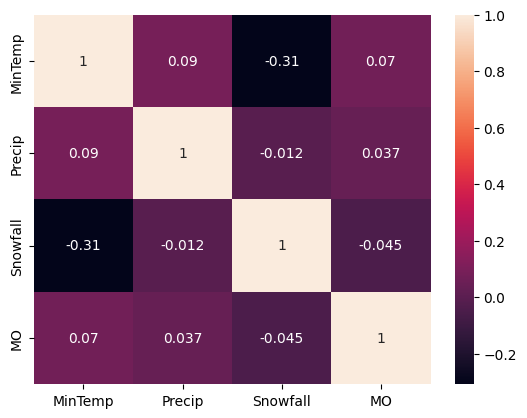

In [44]:
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_13/3962582276.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


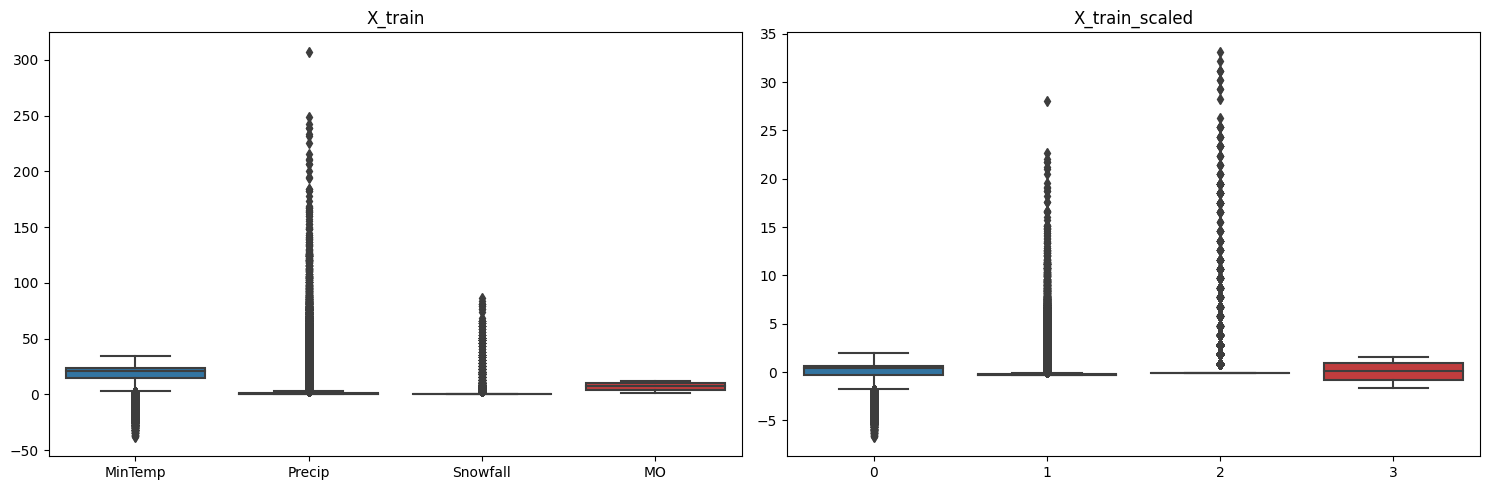

In [47]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.tight_layout()
plt.show()

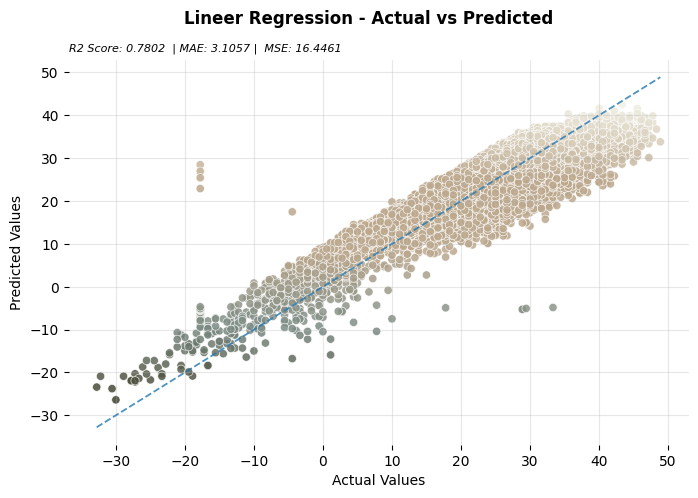

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from matplotlib.colors import LinearSegmentedColormap


linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

color_grad = ['#3E3F29','#7D8D86','#BCA88D','#BCA88D','#F1F0E4']
palette = LinearSegmentedColormap.from_list('custom_palette',color_grad,N=256)

plt.figure(figsize=(8,5))

sns.scatterplot(
    x=y_test,
    y=y_pred,
    hue=y_pred,
    palette=palette,
    alpha=0.85,
    legend=False
)

plt.suptitle("Lineer Regression - Actual vs Predicted",fontsize=12,fontweight='bold')

plt.title(f'R2 Score: {score:.4f}  | MAE: {mae:.4f} |  MSE: {mse:.4f}',fontsize=8,loc='left',style='italic')

ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel("")

ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")

plt.plot([y_test.min(),y_test.max()],
         [y_test.min(),y_test.max()],
        linestyle='--',linewidth=1.3,alpha=0.8)

plt.grid(axis='both',which='both',alpha=0.3)

for spine in ax.spines.values():
    spine.set_color('None')

plt.show()


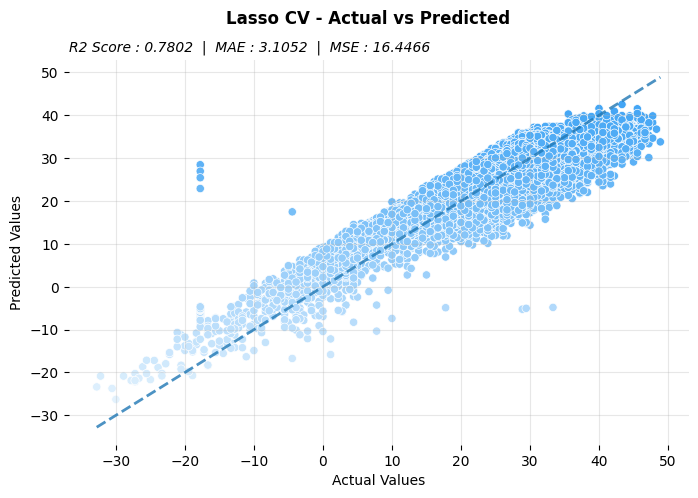

In [49]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV()
lassoCV.fit(X_train_scaled,y_train)
y_pred = lassoCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

color_grad = ['#E3F2FD', '#BBDEFB', '#90CAF9', '#64B5F6', '#42A5F5']
palette = LinearSegmentedColormap.from_list('custom_palette',color_grad)

plt.figure(figsize=(8,5))

sns.scatterplot(
    x=y_test,
    y=y_pred,
    hue=y_pred,
    palette=palette,
    legend=False
)

plt.suptitle('Lasso CV - Actual vs Predicted',fontsize=12,fontweight='bold')
plt.title(f'R2 Score : {score:.4f}  |  MAE : {mae:.4f}  |  MSE : {mse:.4f}',fontsize = 10 , style = 'italic',loc='left')

ax = plt.gca()
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")

plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],
         linestyle="dashed",
         linewidth=2,
         alpha=0.8
        )


plt.grid(axis='both',which='major',alpha=0.3)


for spine in ax.spines.values():
    spine.set_color('None')


plt.show()

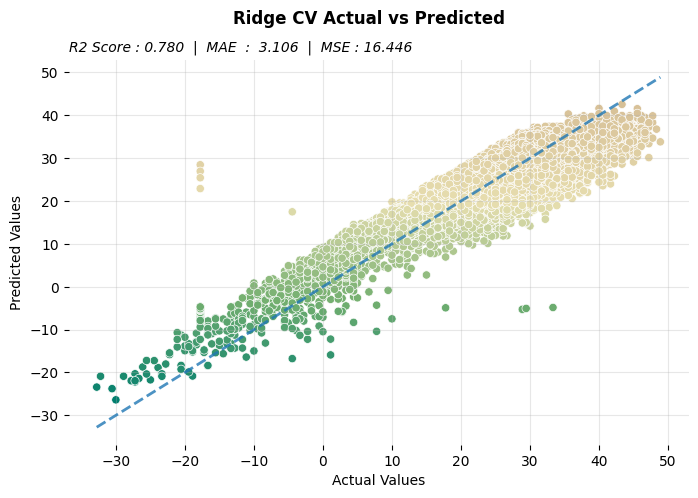

In [50]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled,y_train)
y_pred = ridgeCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

color_grad = ['#007E6E','#73AF6F','#E7DEAF','#D7C097']
palette = LinearSegmentedColormap.from_list('custom_palette',color_grad)

plt.figure(figsize=(8,5))

sns.scatterplot(
    x=y_test,
    y=y_pred,
    hue=y_pred,
    palette=palette,
    legend=False
)

plt.suptitle('Ridge CV Actual vs Predicted',fontweight='bold',fontsize=12)
plt.title(f'R2 Score : {score:.3f}  |  MAE  :  {mae:.3f}  |  MSE : {mse:.3f}',loc='left',style='italic',fontsize=10)

ax = plt.gca()
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')


plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()] , alpha = 0.8 , linewidth=2 , linestyle='--')

plt.grid(axis='both',which='major',alpha=0.3)


for spine in ax.spines.values():
    spine.set_color('None')
    
plt.show()

